<a href="https://colab.research.google.com/github/prasathnarayanan6/Hrapp/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import librosa as lb
import IPython.display as ipd
from itertools import cycle
from tqdm import tqdm

In [5]:
import scipy.io.wavfile
from numpy.fft import fft, fftfreq
import seaborn as sns
from glob import glob
import librosa.display

In [6]:
import glob
# import pandas as pd
import os
import matplotlib.pylab as plt
dataset_path = '/content/drive/MyDrive/Project_data/mridangam_stroke_1.0'
data = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            full_path = os.path.join(root, file)
            pitch = os.path.basename(root)
            filename = os.path.splitext(file)[0]
            for stroke_name in ['bheem', 'ta', 'tha', 'num', 'thom', 'thi', 'dhin', 'dheem', 'tham', 'cha']:
                if stroke_name in filename.lower():
                    stroke = stroke_name
                    break
            else:
                stroke = "unknown"

            data.append((pitch, stroke, full_path))
            print(f"Pitch: {pitch}, Stroke: {stroke}, File: {full_path}")

Streaming output truncated to the last 5000 lines.
Pitch: E, Stroke: thi, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/231073__akshaylaya__thi-e-315.wav
Pitch: E, Stroke: thi, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/231065__akshaylaya__thi-e-307.wav
Pitch: E, Stroke: ta, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/230543__akshaylaya__ta-e-101.wav
Pitch: E, Stroke: ta, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/230459__akshaylaya__ta-e-017.wav
Pitch: E, Stroke: dhin, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/230329__akshaylaya__dhin-e-061.wav
Pitch: E, Stroke: thi, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/231011__akshaylaya__thi-e-253.wav
Pitch: E, Stroke: tha, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/230718__akshaylaya__tham-e-010.wav
Pitch: E, Stroke: thi, File: /content/drive/MyDrive/Project_data/mridangam_stroke_1.0/E/230817__

In [7]:
df = pd.DataFrame(data, columns=['pitch', 'stroke', 'file_path'])
print(df.head())

  pitch stroke                                          file_path
0    D#    cha  /content/drive/MyDrive/Project_data/mridangam_...
1    D#    thi  /content/drive/MyDrive/Project_data/mridangam_...
2    D#     ta  /content/drive/MyDrive/Project_data/mridangam_...
3    D#    thi  /content/drive/MyDrive/Project_data/mridangam_...
4    D#     ta  /content/drive/MyDrive/Project_data/mridangam_...


In [8]:
#intenstity wave height or amplitude(db)
#frequency differences in the wave
ipd.Audio(df.iloc[0].file_path);
# print(df.iloc[:, -1].head())
file_path = df['file_path'].iloc[0]
print(file_path)

/content/drive/MyDrive/Project_data/mridangam_stroke_1.0/D#/228684__akshaylaya__cha-dsh-045.wav


In [ ]:
# y, sr = lb.load(df.iloc[0].file_path);
audio_data = []
sample_rates = []
for file_path in tqdm(df['file_path'], desc='Loading audio files'):
    try:
        y, sr = lb.load(file_path, sr=None)
        audio_data.append(y)
        sample_rates.append(sr)
    except Exception as e:
        print(f"❌ Failed to load {file_path}: {e}")

Loading audio files:  23%|██▎       | 1666/7162 [02:32<34:20,  2.67it/s]

In [2]:
# print(f'y:{y[:10]}')
# print(f'shape y: {y.shape}')
# print(f'sr:{sr}')
# print(y)

NameError: name 'y' is not defined

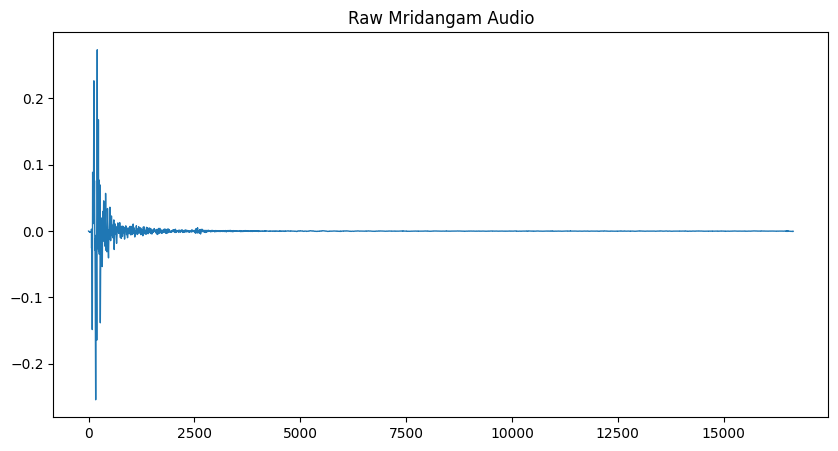

In [ ]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw Mridangam Audio')
plt.show()

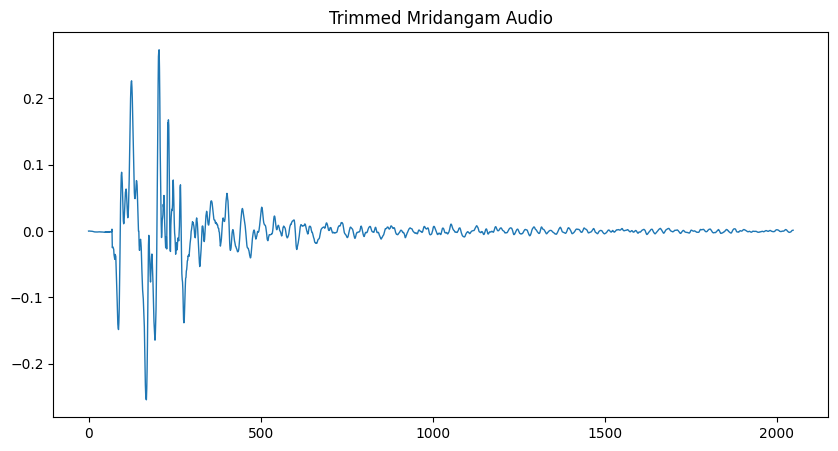

In [ ]:
y_trimmed, _ = lb.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Trimmed Mridangam Audio')
plt.show()

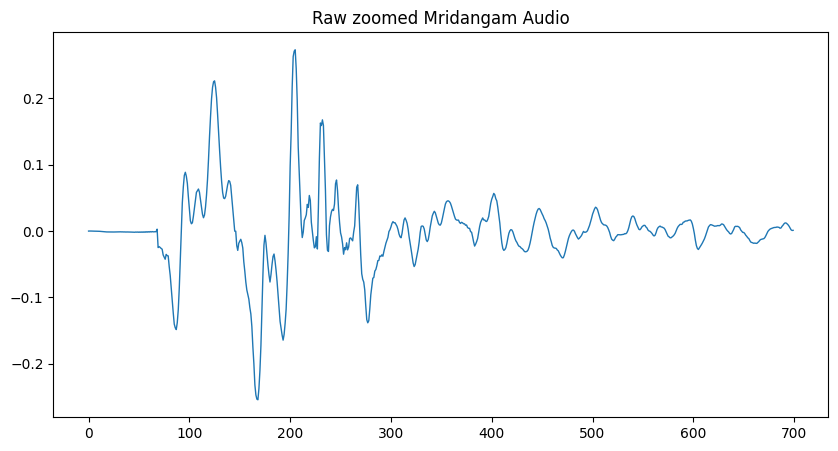

In [ ]:
pd.Series(y[0:700]).plot(figsize=(10, 5), lw=1, title='Raw zoomed Mridangam Audio')
plt.show()

In [ ]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 33)

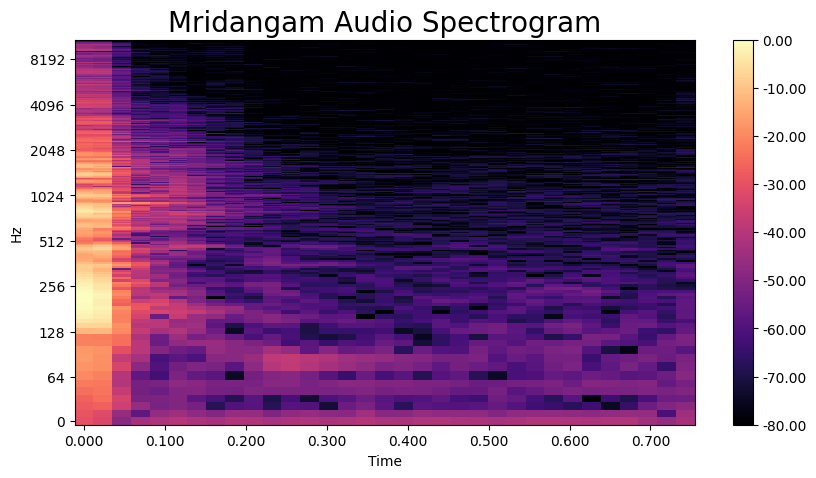

In [ ]:
#plot
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mridangam Audio Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
s = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2)
s_db_mel = librosa.amplitude_to_db(s, ref=np.max)

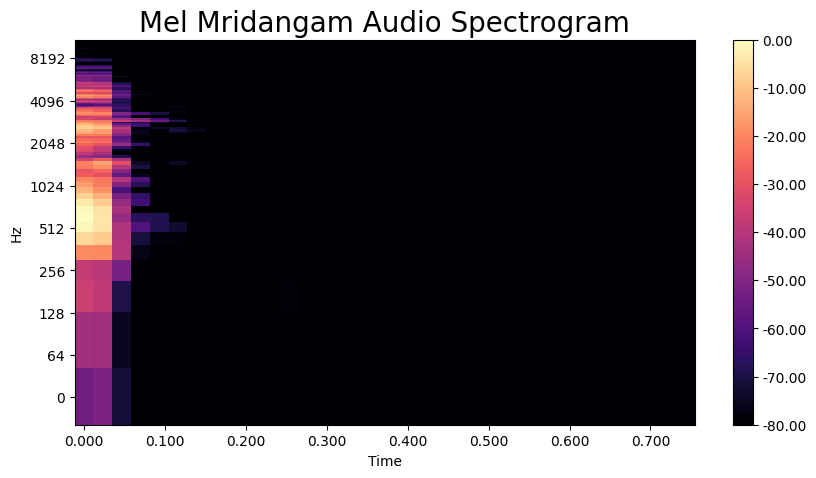

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Mridangam Audio Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()